This jupyter notebook is for testing painting GREAT array profiles onto the sky

In [1]:
#Import library
from pylab import *
import sens_map_lib


In [2]:
#Generate an LFA array object
lfa_array = sens_map_lib.LFA_array()

In [3]:
#Generate sky object
sky_grid = sens_map_lib.sky(200, 200, 0.2)

In [4]:
#Clear sky grid
sky_grid.clear()

#Test a single pointing being painted onto the sky
lfa_array.single_point(sky_grid, x=100.0, y=100.0, array_angle=0.0, time=1.0, cycles=1)

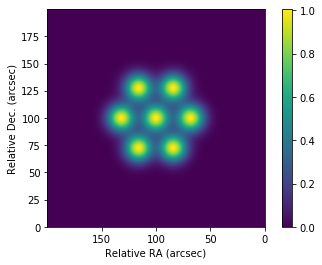

In [5]:
#Show result
figure()
imshow(sky_grid.data, origin='bottom', extent=sky_grid.extent)
xlabel('Relative RA (arcsec)')
ylabel('Relative Dec. (arcsec)')
colorbar()


In [6]:
#Clear sky grid
sky_grid.clear()

#Test a raster map on the sky
lfa_array.map(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=20.0, nx=3, ny=9,
                    dx=8.0, dy=8.0, time=10.0, cycles=1)

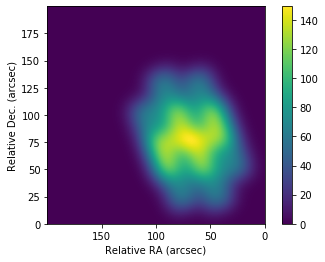

In [7]:
#Show result
figure()
imshow(sky_grid.data, origin='bottom', extent=sky_grid.extent)
xlabel('Relative RA (arcsec)')
ylabel('Relative Dec. (arcsec)')
colorbar()

In [8]:
#Clear sky grid
sky_grid.clear()

#Test something like an OTF map on the sky
lfa_array.map(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=20.0, nx=21, ny=21,
                    dx=6.0, dy=6.0, time=1.0, cycles=5)

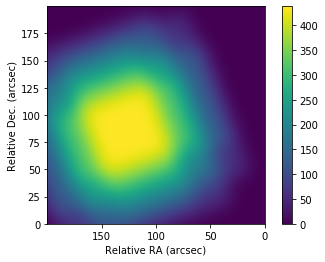

In [9]:
#Show result
figure()
imshow(sky_grid.data, origin='bottom', extent=sky_grid.extent)
xlabel('Relative RA (arcsec)')
ylabel('Relative Dec. (arcsec)')
colorbar()

In [10]:
#Clear sky grid
sky_grid.clear()

#Test honeycomb map on the sky
lfa_array.honeycomb(sky_grid, x=50.0, y=50.0, array_angle=0.0, map_angle=0.0, time=1.0, cycles=5)

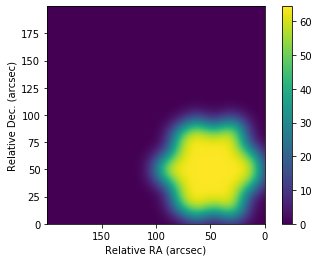

In [11]:
#Show result
figure()
imshow(sky_grid.data, origin='bottom', extent=sky_grid.extent)
xlabel('Relative RA (arcsec)')
ylabel('Relative Dec. (arcsec)')
colorbar()

In [18]:
#Read in .aor file and show what's inside, the result is a list of aor objects
aors = sens_map_lib.open_aors('test.aor')

#Set up a new sky grid for this
sky_grid = sens_map_lib.sky([-100.0, 150.0], [-100.0, 150.0], 0.2)

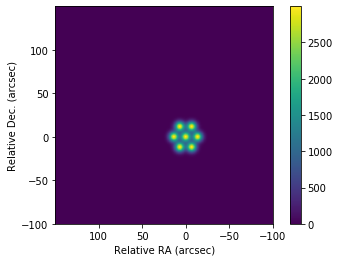

In [19]:
#Paint HFA first aor which is a single pointing
sky_grid.clear() #Clear sky grid
aors[0].paint(sky_grid, 'HFA') #Paint onto sky from aor

#Show result
figure()
imshow(sky_grid.data, origin='bottom', extent=sky_grid.extent)
xlabel('Relative RA (arcsec)')
ylabel('Relative Dec. (arcsec)')
colorbar()

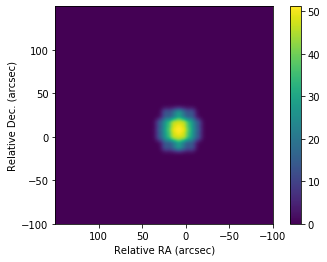

In [20]:
#Paint HFA second aor which is a Raster map
sky_grid.clear() #Clear sky grid
aors[1].paint(sky_grid, 'HFA') #Paint onto sky from aor

#Show result
figure()
imshow(sky_grid.data, origin='bottom', extent=sky_grid.extent)
xlabel('Relative RA (arcsec)')
ylabel('Relative Dec. (arcsec)')
colorbar()

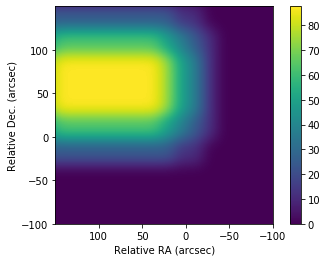

In [21]:
#Paint LFA third aor which is a OTF map
sky_grid.clear() #Clear sky grid
aors[2].paint(sky_grid, 'LFA') #Paint onto sky from aor

#Show result
figure()
imshow(sky_grid.data, origin='bottom', extent=sky_grid.extent)
xlabel('Relative RA (arcsec)')
ylabel('Relative Dec. (arcsec)')
colorbar()

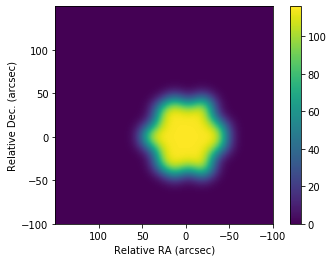

In [22]:
#Paint LFA fourth aor which is a honeycomb map
sky_grid.clear() #Clear sky grid
aors[3].paint(sky_grid, 'LFA') #Paint onto sky from aor

#Show result
figure()
imshow(sky_grid.data, origin='bottom', extent=sky_grid.extent)
xlabel('Relative RA (arcsec)')
ylabel('Relative Dec. (arcsec)')
colorbar()